# Data Exploration
Our goal in this notebook is to begin understand how to acess the data from the spotify .json files and then see how I can compare and manipulate them in comparison to the tcc_ceds_music.csv data

In [122]:
# importing all necessary packages
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [113]:
p1 = open('/Users/victoria/Documents/me/MusicDataAnalysis/data/raw/data/mpd.slice.0-999.json')
data = json.load(p1)
features = pd.read_csv('/Users/victoria/Documents/me/MusicDataAnalysis/data/external/musicoset_songfeatures/acoustic_features.csv',delimiter="\t")
songs = pd.read_csv('/Users/victoria/Documents/me/MusicDataAnalysis/data/external/musicoset_metadata/songs.csv',delimiter="\t")
songs_tcc = pd.read_csv('/Users/victoria/Documents/me/MusicDataAnalysis/data/external/tcc_ceds_music.csv',delimiter=",")

In [114]:
playlists = data['playlists']
features.head()
songs_tcc.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


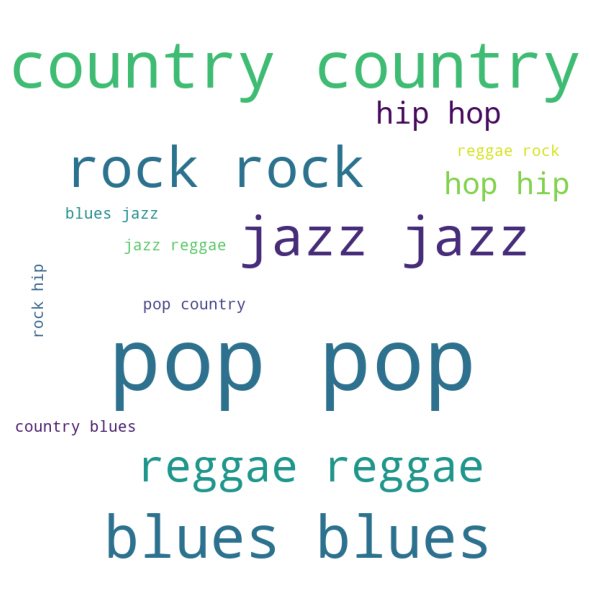

In [126]:
text = " ".join(review for review in songs_tcc['genre'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [127]:
print(songs_tcc['genre'].unique())

['pop' 'country' 'blues' 'jazz' 'reggae' 'rock' 'hip hop']


In [7]:
#Let's see if we can find a specific song in the other dataset
toxic_data = playlists[0]['tracks'][1]
toxic_id = toxic_data['track_uri']
toxic_id = toxic_id.replace("spotify:track:", "")
print(toxic_id)

6I9VzXrHxO9rA9A5euc8Ak


In [35]:
#looking for features for toxic
toxic_features = features.loc[features['song_id'] == toxic_id]
#print(toxic_features)
y = toxic_features['duration_ms'][3847]
x = toxic_features[toxic_features['song_id'] == toxic_id]['duration_ms'].values
print(x[0])

198800


## Playlist Analysis
Now that we are able to locate specifc features about each song, let's work on finding this information for all songs in a specific playlist and average them!

In [54]:
# setup all the variables 
sum_acousticness = 0
sum_danceability = 0
sum_energy = 0
sum_instrumentalness = 0
sum_liveness = 0
sum_tempo = 0
sum_song_count = 0

#sum
for song in playlists[0]['tracks']:
    song_id = song['track_uri'].replace("spotify:track:", "")
    song_features = features.loc[features['song_id'] == song_id]
    if(not song_features.empty):
        sum_acousticness += song_features[song_features['song_id'] == song_id]['acousticness'].values[0]
        sum_danceability += song_features[song_features['song_id'] == song_id]['danceability'].values[0]
        sum_energy += song_features[song_features['song_id'] == song_id]['energy'].values[0]
        sum_instrumentalness += song_features[song_features['song_id'] == song_id]['instrumentalness'].values[0]
        sum_liveness += song_features[song_features['song_id'] == song_id]['liveness'].values[0]
        sum_tempo += song_features[song_features['song_id'] == song_id]['tempo'].values[0]
        sum_song_count += 1

#average
avg_acousticness = sum_acousticness/sum_song_count
avg_danceability = sum_danceability/sum_song_count
avg_energy = sum_energy/sum_song_count
avg_instrumentalness = sum_instrumentalness/sum_song_count
avg_liveness = sum_liveness/sum_song_count
avg_tempo = sum_tempo/sum_song_count

Now that we have the sum for most of the features, we can look into finding songs similar to these features

In [130]:
# Compute the average values of each feature
averages = features.mean()

# Calculate the variance of each feature
variances = features.var()

print(variances)

duration_ms         4.496636e+09
key                 1.272428e+01
mode                1.984682e-01
time_signature      8.361472e-02
acousticness        6.989151e-02
danceability        2.268836e-02
energy              3.885615e-02
instrumentalness    2.836468e-02
liveness            2.691139e-02
loudness            1.290999e+01
speechiness         5.530789e-03
valence             5.594502e-02
tempo               7.663742e+02
dtype: float64


In [73]:
dict = {'acousticness': avg_acousticness,
        'danceability': avg_danceability,
        'energy': avg_energy,
        'instrumentalness': avg_instrumentalness,
        'liveness': avg_liveness,
        'tempo': avg_tempo
        }
# create series from dictionary
averages = pd.Series(dict)

# Calculate the variance of each feature
variances = features.var()

In [135]:
variance_range = 0.01
upper_bound = averages + variance_range
lower_bound = averages - variance_range

lower_bound_acousticness = avg_acousticness - variances['acousticness']
upper_bound_acousticness = avg_acousticness + variances['acousticness']

lower_bound_danceability = avg_danceability - variances['danceability']
upper_bound_danceability = avg_danceability + variances['danceability']

lower_bound_energy = avg_energy - variances['energy']
upper_bound_energy = avg_energy + variances['energy']

lower_bound_instrumentalness = avg_instrumentalness - variances['instrumentalness']
upper_bound_instrumentalness = avg_instrumentalness + variances['instrumentalness']

lower_bound_liveness = avg_liveness - variances['liveness']
upper_bound_liveness = avg_liveness + variances['liveness']

lower_bound_tempo = avg_tempo - variances['tempo']*0.01
upper_bound_tempo = avg_tempo + variances['tempo']*0.01

'''
PROMPT:
I have a dataframe with different songs in each row. 
selected 5 songs and got their average values for each of the features. 
I now want to go through the entire dataframe and find the rows that have the closest values of each 
feature to the average, plus or minus vairance 0.01 for only two features
'''


for i in range(len(features)):
     if(features.loc[i, "acousticness"] >= lower_bound_acousticness and features.loc[i, "acousticness"]<= upper_bound_acousticness): 
          if(features.loc[i, "danceability"] >= lower_bound_danceability and features.loc[i, "danceability"]<= upper_bound_danceability): 
               if(features.loc[i, "energy"] >= lower_bound_energy and features.loc[i, "energy"]<= upper_bound_energy): 
                    if(features.loc[i, "instrumentalness"] >= lower_bound_instrumentalness and features.loc[i, "instrumentalness"]<= upper_bound_instrumentalness): 
                         if(features.loc[i, "liveness"] >= lower_bound_liveness and features.loc[i, "liveness"]<= upper_bound_liveness): 
                              if(features.loc[i, "tempo"] >= lower_bound_tempo and features.loc[i, "tempo"]<= upper_bound_tempo): 
                                   id = features.loc[i, "song_id"]
                                   #toxic_features[toxic_features['song_id'] == toxic_id]['duration_ms'].values
                                   name = songs[songs['song_id'] == id].values
                                   #artist = 
                                   print(name)

[['7z8k6KAvjHX3RtkYNhIC9B' 'Magic' "('Magic', 'The Cars')"
  "{'6DCIj8jNaNpBz8e5oKFPtp': 'The Cars'}" 48 False 'Solo']]
[['0Jcnr8HUGQdaOiSkqpdEKX' 'Something About the Sunshine'
  "('Something About The Sunshine', 'Christopher Wilde & Anna Margaret')"
  "{'533HtQP5btWIZcKlHJtEWK': 'Christopher Wilde', '5ywxtrr3mhjBezbQAsGiFW': 'Anna Margaret'}"
  52 False 'Collaboration']]
